# Introduction to World Bank Indicators API

This notebook demonstrates how to use the World Bank Indicators API for querying, processing, and visualizing development data. The examples will cover data retrieval, processing steps, and creating insightful visualizations.


# *Environment Configuration*

To run this notebook seamlessly, you need to set up an environment with the required packages. Use the following steps to create a dedicated environment and install all dependencies:

### Step 1: Create a Conda Environment
Use `conda` to create an environment with the primary dependencies:

```bash
conda create -n myenv python=3.12 numpy pandas matplotlib seaborn geopandas shapely scipy requests
```

### Step 2: Activate the Environment
Activate the newly created environment:

```bash
conda activate myenv
```

### Step 3: Install Additional Dependencies
Install the `wbdata` package from PyPI using `pip`:

```bash
pip install wbdata
```

### Summary
After completing these steps, your environment will include the following packages:

- **Core Libraries**: `numpy`, `pandas`, `matplotlib`, `seaborn`
- **Geospatial Libraries**: `geopandas`, `shapely`
- **Statistical Libraries**: `scipy`
- **API Interaction**: `requests`, `wbdata`

Once the environment is ready, you can launch Jupyter Notebook or your preferred editor to begin working with this project.

# **World Bank Indicators API**

## **1.A** Exploring World Bank Data: Fetching Country Information

This section provides a structured approach to exploring and analyzing World Bank data while learning how to work with APIs and handle JSON responses in Python. Below is an overview of the steps we will follow:

---

### Steps in the Code:

1. **Define the API Endpoint**
   We start by specifying the base URL and endpoint for the World Bank API. Parameters are included to ensure the data is returned in JSON format, and a high number of results per page is set to minimize pagination.

2. **Initialize Data Storage**
   An empty list is created to store country data retrieved from the API.

3. **Fetch Metadata**
   The first API request retrieves metadata, including the total number of pages of results, to determine how many pages of data need to be fetched.

4. **Iterate Through Pages**
   Using a loop, we fetch data from each page and extract relevant details for every country. Information includes:
   - **Country ID**
   - **Name**
   - **Region**
   - **Income Level**
   - **Capital City**
   - **Longitude and Latitude**

5. **Store the Data in a DataFrame**
   Once all data is retrieved, it is converted into a Pandas DataFrame for easier analysis and manipulation.

6. **Clean the Data**
   The DataFrame is cleaned by removing any duplicate entries based on the country ID.

7. **Display and Save the Data**
   The first few rows of the DataFrame are displayed to verify the results. The final dataset is saved as a CSV file (`worldbank_countries.csv`) for future use.

---

### Example Output

After running the code, you will see:
1. Metadata about the total number of pages to fetch.
2. Updates as each page of data is retrieved.
3. A preview of the processed country data in tabular form.
4. Confirmation that the data has been successfully saved to a CSV file.

---
 ### API Endpoint
        - Base URL: `https://api.worldbank.org/v2/country`
        - Parameters:
          - `format=json`: Specifies the data format.
          - `per_page`: Determines the number of results per page.
---
This approach ensures an organized workflow for interacting with the World Bank API, processing the data, and preparing it for analysis.


In [6]:
import requests
import pandas as pd

# Define base URL, endpoint, and query parameters
base_url = 'http://api.worldbank.org/v2'
endpoint = '/country'
format_param = '?format=json&per_page=1000'

# Fetch metadata to determine total pages of data
response = requests.get(base_url + endpoint + format_param)
if response.status_code != 200:
    print(f"Failed to fetch data. Status code: {response.status_code}")
    exit()

data = response.json()
total_pages = data[0].get('pages', 1)
print(f"Total pages of data to fetch: {total_pages}")

# Initialize country data list and fetch all pages
list_countries = []
for page in range(1, total_pages + 1):
    print(f"Fetching page {page} of {total_pages}...")
    response = requests.get(f"{base_url}{endpoint}{format_param}&page={page}")
    if response.status_code != 200:
        print(f"Failed to fetch page {page}. Status code: {response.status_code}")
        break
    list_countries.extend([{
        'ID': c.get('id', ''),
        'Name': c.get('name', ''),
        'Region': c.get('region', {}).get('value', ''),
        'Income Level': c.get('incomeLevel', {}).get('value', ''),
        'Capital City': c.get('capitalCity', ''),
        'Longitude': c.get('longitude', ''),
        'Latitude': c.get('latitude', '')
    } for c in response.json()[1]])

# Convert to DataFrame, remove duplicates, and save to CSV
df_countries = pd.DataFrame(list_countries).drop_duplicates(subset=['ID'])
print("Sample of fetched country data:\n", df_countries.head())
df_countries.to_csv('worldbank_countries.csv', index=False)
print("Data saved to 'worldbank_countries.csv'.")

Total pages of data to fetch: 1
Fetching page 1 of 1...
Sample of fetched country data:
     ID                         Name                      Region Income Level  \
0  ABW                        Aruba  Latin America & Caribbean   High income   
1  AFE  Africa Eastern and Southern                  Aggregates   Aggregates   
2  AFG                  Afghanistan                  South Asia   Low income   
3  AFR                       Africa                  Aggregates   Aggregates   
4  AFW   Africa Western and Central                  Aggregates   Aggregates   

  Capital City Longitude Latitude  
0   Oranjestad  -70.0167  12.5167  
1                                  
2        Kabul   69.1761  34.5228  
3                                  
4                                  
Data saved to 'worldbank_countries.csv'.


## **1.B** Exploring World Bank Data Using `wbdata`

In this section, we will leverage the `wbdata` Python package to fetch and process country information from the World Bank database. This package simplifies interaction with the World Bank API, eliminating the need to manually handle requests and parse JSON responses.

---

### Steps:

1. **Install and Import `wbdata`**
   The `wbdata` package is specifically designed for accessing World Bank data. We will install and import it to streamline the data-fetching process.

2. **Fetch Country Data**
   Using `wbdata`, we will retrieve information about countries, including:
   - **Country ID**
   - **Name**
   - **Region**
   - **Income Level**
   - **Capital City**
   - **Longitude and Latitude**

3. **Store the Data in a DataFrame**
   The retrieved data will be organized into a Pandas DataFrame for easy analysis and manipulation.

4. **Save the Data**
   The final DataFrame will be saved as a CSV file (`worldbank_countries_wbdata.csv`) for future use.

---

### Example Output:

After running the code, you will see:
1. A preview of the country data in tabular format.
2. Confirmation that the data has been successfully saved to a CSV file.

---

This streamlined approach with `wbdata` offers a quick and efficient way to access and work with World Bank data, making it an excellent tool for data analysts and researchers.


In [7]:
# Install the wbdata package (if not already installed)
# !pip install wbdata

import wbdata
import pandas as pd

# Step 1: Fetch country data using wbdata
print("Fetching country data from World Bank using wbdata...")
countries = wbdata.get_countries()

# Step 2: Organize the data into a Pandas DataFrame
print("Organizing data into a DataFrame...")
list_countries = [
    {
        "ID": country.get("id", ""),
        "Name": country.get("name", ""),
        "Region": country.get("region", {}).get("value", ""),
        "Income Level": country.get("incomeLevel", {}).get("value", ""),
        "Capital City": country.get("capitalCity", ""),
        "Longitude": country.get("longitude", ""),
        "Latitude": country.get("latitude", "")
    }
    for country in countries
]

df_countries = pd.DataFrame(list_countries)

# Step 3: Clean up the DataFrame (e.g., remove duplicates)
print("Cleaning up the data...")
df_countries.drop_duplicates(subset=["ID"], inplace=True)

# Display the first few rows of the DataFrame
print("Sample of fetched country data:")
print(df_countries.head())

# Step 4: Save the DataFrame to a CSV file
output_file = '../worldbank_countries_wbdata.csv'
df_countries.to_csv(output_file, index=False)
print(f"Country data has been saved to '{output_file}'.")


Fetching country data from World Bank using wbdata...
Organizing data into a DataFrame...
Cleaning up the data...
Sample of fetched country data:
    ID                         Name                      Region Income Level  \
0  ABW                        Aruba  Latin America & Caribbean   High income   
1  AFE  Africa Eastern and Southern                  Aggregates   Aggregates   
2  AFG                  Afghanistan                  South Asia   Low income   
3  AFR                       Africa                  Aggregates   Aggregates   
4  AFW   Africa Western and Central                  Aggregates   Aggregates   

  Capital City Longitude Latitude  
0   Oranjestad  -70.0167  12.5167  
1                                  
2        Kabul   69.1761  34.5228  
3                                  
4                                  
Country data has been saved to '../worldbank_countries_wbdata.csv'.


# **2.** *Analyzing Data for the United States (US) and Its Peer Countries*

This analysis focuses on the United States (US) and its peer countries, categorized into:
1. **Same Region**: Countries located in the same region as the United States.
2. **Same Income Level and Lending Type**: Countries with a similar income classification and lending type as the United States.

Using the `wbdata` package, we will extract and organize details such as region, income level, lending type, and geographic coordinates for the United States and its peer groups.

---

### Workflow:

1. **Retrieve United States Data**
   Fetch detailed information for the United States, including:
   - **Name, Region, Income Level, and Lending Type**
   - **Capital City**
   - **Geographic Coordinates (Longitude, Latitude)**

2. **Identify Peer Countries**
   - **By Region**: Countries in the same region as the United States.
   - **By Income Level and Lending Type**: Countries with the same income classification and lending type.

3. **Visualize Data**
   Organize the details of the United States and its peer countries into separate tables for clear presentation.

4. **Export Results**
   Save data for the United States, "Same Region" peers, and "Same Income Level and Lending Type" peers into separate CSV files for future reference.

---

### Key Takeaways:

- **Regional and Economic Insights**: Gain a deeper understanding of the United States' regional and economic context, including its lending classification.
- **Comparative Analysis**: Identify and benchmark peer countries based on region, income level, and lending type.
- **Organized Data**: Facilitate further analysis through structured CSV exports.

---

This enhanced analysis provides a comprehensive perspective on the United States' position within its region and economic group, incorporating lending classification as an additional dimension for comparison.


In [8]:
###ADD LENDING TYPE TO THIS CODE BLOCk
###
###
###
print("Fetching all country data from World Bank...")
countries = wbdata.get_countries()

country_code = "USA"
us_data = next((country for country in countries if country.get("id") == country_code), None)

if not us_data:
    print("No data found for the United States (US).")
else:
    def extract_country_details(country):
        return {
            "ID": country.get("id", ""),
            "Name": country.get("name", ""),
            "Region": country.get("region", {}).get("value", ""),
            "Income Level": country.get("incomeLevel", {}).get("value", ""),
            "Lending Type": country.get("lendingType", {}).get("value", ""),
            "Capital City": country.get("capitalCity", ""),
            "Longitude": country.get("longitude", ""),
            "Latitude": country.get("latitude", "")
        }

    us_details = extract_country_details(us_data)
    print("\nDetails for the United States:")
    print(us_details)

    us_region = us_details["Region"]
    us_income_level = us_details["Income Level"]
    us_lending_type=us_details["Lending Type"]

    def filter_countries(key, value):
        return [extract_country_details(country) for country in countries if country.get(key, {}).get("value", "") == value]

    same_region_countries = filter_countries("region", us_region)
    same_income_countries = filter_countries("incomeLevel", us_income_level)
    same_lending_type = filter_countries("lendingType",us_lending_type)
    df_us = pd.DataFrame([us_details])
    df_same_region = pd.DataFrame(same_region_countries)
    df_same_income = pd.DataFrame(same_income_countries)
    df_same_lending=pd.DataFrame(same_lending_type)

    print("\nCountries in the Same Region:")
    print(df_same_region)
    print("\nCountries with the Same Income Level:")
    print(df_same_income)
    print("\nCountries with the Same Lending Type:")
    print(df_same_lending)

    file_paths = {
        "us_country_data.csv": df_us,
        "same_region_countries.csv": df_same_region,
        "same_income_countries.csv": df_same_income,
        "same_lending_type.csv":df_same_lending
    }

    for file, df in file_paths.items():
        df.to_csv(file, index=False)
        print(f"Data has been saved to '{file}'.")


Fetching all country data from World Bank...

Details for the United States:
{'ID': 'USA', 'Name': 'United States', 'Region': 'North America', 'Income Level': 'High income', 'Lending Type': 'Not classified', 'Capital City': 'Washington D.C.', 'Longitude': '-77.032', 'Latitude': '38.8895'}

Countries in the Same Region:
    ID           Name         Region Income Level    Lending Type  \
0  BMU        Bermuda  North America  High income  Not classified   
1  CAN         Canada  North America  High income  Not classified   
2  USA  United States  North America  High income  Not classified   

      Capital City Longitude Latitude  
0         Hamilton   -64.706  32.3293  
1           Ottawa  -75.6919  45.4215  
2  Washington D.C.   -77.032  38.8895  

Countries with the Same Income Level:
     ID                    Name                      Region Income Level  \
0   ABW                   Aruba  Latin America & Caribbean   High income   
1   AND                 Andorra       Europe & Cent

## 2.A Plotting Countries with Geographic Shapes Using GeoPandas

In this section, we enhance our visualization by combining country boundaries with data points using GeoPandas. This approach adds geographic context, making it easier to interpret relationships between data points and their spatial distribution.

---

### Steps:

1. **Load a GeoJSON Dataset**:
   Use a GeoJSON file containing country boundaries. In this example, the dataset is sourced from [OpenDataSoft's World Administrative Boundaries](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/?flg=en-us).

2. **Prepare the Dataset**:
   Load the GeoJSON file into a GeoDataFrame, ensuring the coordinate reference system (CRS) is compatible with the latitude and longitude points in our data.

3. **Combine Geographic Shapes with Data Points**:
   Use a spatial join to associate country shapes with the corresponding data points. Ensure that points representing countries are accurately positioned within their respective boundaries.

4. **Highlight Key Data**:
   Add a new column to the GeoDataFrame to classify countries based on specific criteria (e.g., income level, lending type). Use this classification to style the map, highlighting key countries like the United States.

5. **Visualize the Map**:
   Plot the GeoDataFrame using GeoPandas' built-in plotting functionality. Use a distinct color scheme to differentiate countries based on their classification.

---

### Benefits:
- Incorporates updated and reliable geographic data for accurate mapping.
- Combines geographic boundaries with data points for richer, more informative visualizations.
- Highlights specific countries or data patterns for easy identification.


Fetching country data from World Bank using wbdata...
Organizing data into a DataFrame...


C:\Users\trist\AppData\Local\Temp\ipykernel_10400\3097397094.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_countries['Income Level Match'] = df_filtered_countries['Income Level'] == income_level_to_get
C:\Users\trist\AppData\Local\Temp\ipykernel_10400\3097397094.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_countries['Lending Type Match'] = df_filtered_countries['Lending Type'] == lending_type_to_get
C:\Users\trist\AppData\Local\Temp\ipykernel_10400\3097397094.py:26: Se

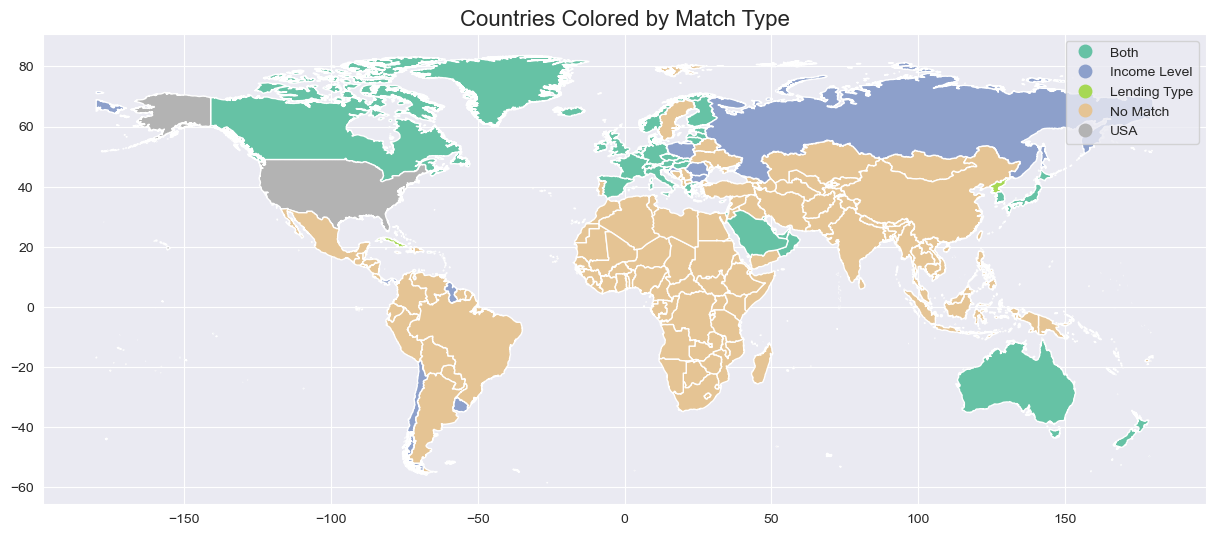

In [9]:
from functions import fetch_and_organize_country_data, pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 0: Fetch and prepare country data
df_all_countries = fetch_and_organize_country_data()
df_all_countries["Latitude"] = pd.to_numeric(df_all_countries["Latitude"], errors="coerce")
df_all_countries["Longitude"] = pd.to_numeric(df_all_countries["Longitude"], errors="coerce")

COUNTRY_TO_OBSERVE = 'USA'

# Step 1: Get target income level and lending type
target_country = df_all_countries[df_all_countries['ID'] == COUNTRY_TO_OBSERVE]
income_level_to_get, lending_type_to_get = target_country[['Income Level', 'Lending Type']].values[0]

# Step 2: Filter countries
df_filtered_countries = df_all_countries[
    (df_all_countries['Income Level'] == income_level_to_get) |
    (df_all_countries['Lending Type'] == lending_type_to_get)
    ]
df_filtered_countries['Income Level Match'] = df_filtered_countries['Income Level'] == income_level_to_get
df_filtered_countries['Lending Type Match'] = df_filtered_countries['Lending Type'] == lending_type_to_get

# Step 3: Add 'Match Type' column
df_filtered_countries['Match Type'] = df_filtered_countries.apply(
    lambda row: COUNTRY_TO_OBSERVE if row['ID'] == COUNTRY_TO_OBSERVE else
    'Both' if row['Income Level Match'] and row['Lending Type Match'] else
    'Income Level' if row['Income Level Match'] else
    'Lending Type' if row['Lending Type Match'] else
    'None',
    axis=1
)

# Step 4: Clean data
df_filtered_countries.drop_duplicates(subset=["ID"], inplace=True)

# Step 5: Load GeoJSON and match spatial data
file_path_geojson = 'world-administrative-boundaries.geojson'
world = gpd.read_file(file_path_geojson).to_crs(epsg=4326)
df_filtered_countries['geometry'] = [Point(xy) for xy in zip(df_filtered_countries['Longitude'], df_filtered_countries['Latitude'])]
points = gpd.GeoDataFrame(df_filtered_countries, geometry='geometry', crs="EPSG:4326")
matched_points = gpd.sjoin(points, world, how='inner', predicate='within')

# Step 6: Map 'Match Type' to world data
world['Match Type'] = world['iso3'].map(matched_points.set_index('ID')['Match Type'].to_dict()).fillna('No Match')

# Step 7: Plot results
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='Match Type', legend=True, cmap='Set2', ax=ax)
ax.set_title("Countries Colored by Match Type", fontsize=16)
plt.show()


# *3.* Misc Visualizations

## *3.A* Income Levels

This script visualizes global income levels using geospatial data. The workflow involves the following steps:

1. **Prepare Data**:
   - Load the dataset and inspect unique income levels.
2. **Load GeoJSON Data**:
   - Import a GeoJSON file containing world country boundaries and set its coordinate reference system.
3. **Create GeoDataFrame for Points**:
   - Convert latitude and longitude values into a GeoDataFrame using shapely's `Point` geometry.
4. **Perform Spatial Join**:
   - Match income level data points to countries via a spatial join operation.
5. **Map Income Levels**:
   - Use a dictionary to map income levels to countries and assign colors for each category.
   - Handle missing categories with a default color.
6. **Visualize the Map**:
   - Plot a world map with countries color-coded by their income levels.
   - Add a legend and title for context and adjust the layout for better presentation.


Unique Income Levels: ['High income' 'Aggregates' 'Low income' 'Lower middle income'
 'Upper middle income' 'Not classified']
Adding missing category 'No Match' to income_colors.


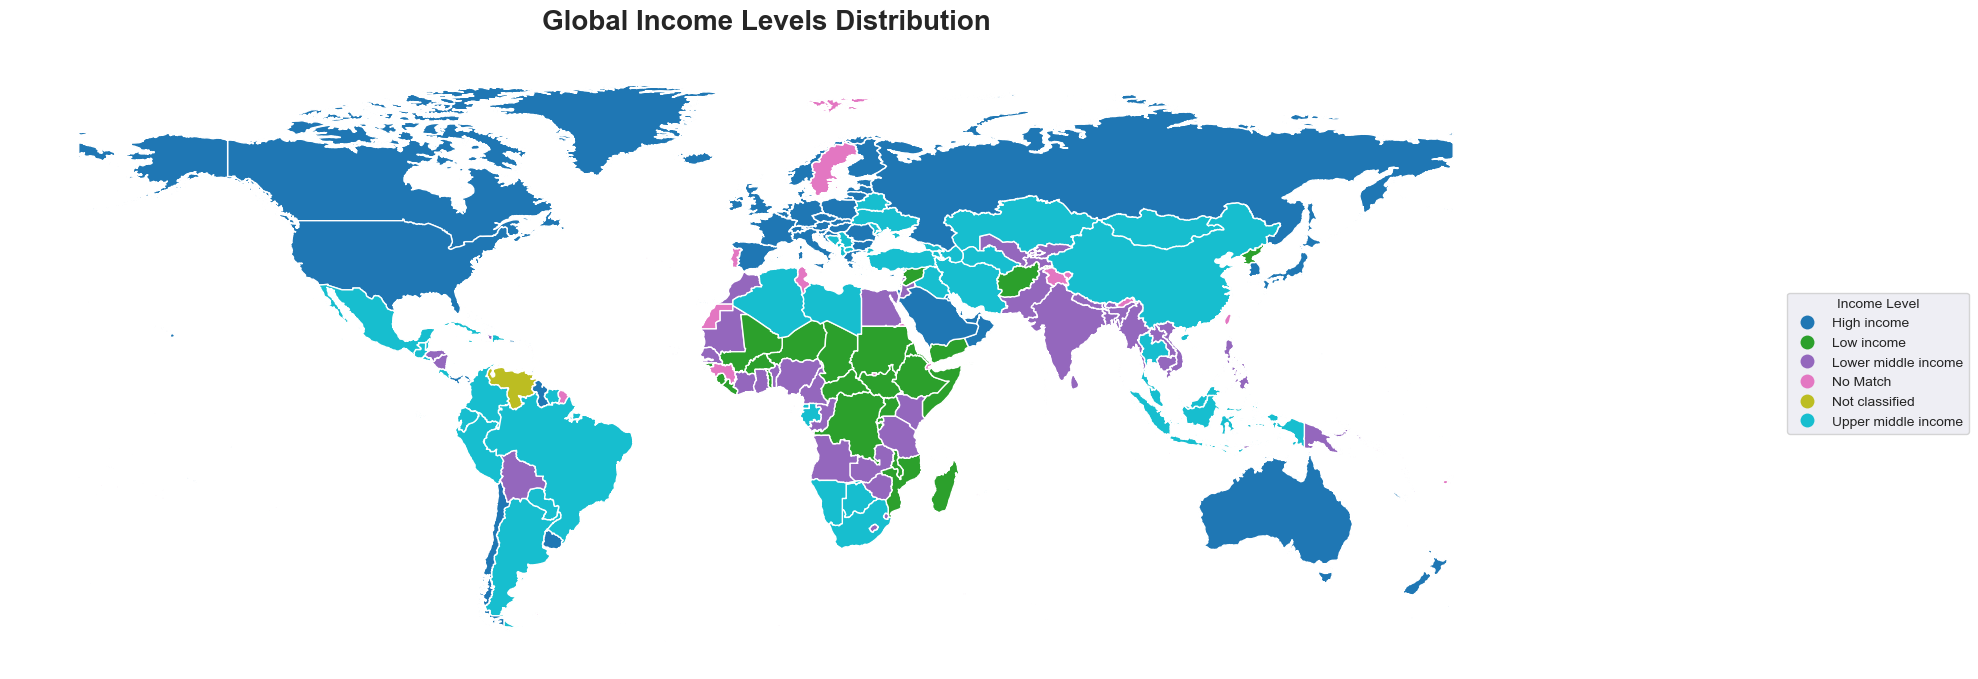

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 1: Prepare Data
# Copy the dataset and inspect unique income levels
df_all_countries["Latitude"] = pd.to_numeric(df_all_countries["Latitude"], errors="coerce")
df_all_countries["Longitude"] = pd.to_numeric(df_all_countries["Longitude"], errors="coerce")
data = df_all_countries.copy()
print("Unique Income Levels:", data['Income Level'].unique())

# Step 2: Load GeoJSON Data
# Read the GeoJSON file containing country boundaries
# Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326)
world = gpd.read_file(file_path_geojson)
world = world.to_crs(epsg=4326)

# Step 3: Create GeoDataFrame for Points
# Convert latitude and longitude columns into geometry points
data['geometry'] = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
points = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")

# Step 4: Perform Spatial Join
# Match points to countries using a spatial join
# This associates each point (income data) with the corresponding country geometry
matched_points = gpd.sjoin(points, world, how='inner', predicate='within')

# Step 5: Map Income Levels
# Map income levels to countries using the 'iso3' field from world and 'ID' from data
world['Income Level'] = world['iso3'].map(matched_points.set_index('ID')['Income Level'].to_dict()).fillna('No Match')

# Define custom colors for each income level category
income_colors = {
    'Low income': '#e41a1c',            # Bright red
    'Lower middle income': '#377eb8',   # Strong blue
    'High income': '#4daf4a',           # Vibrant green
    'Upper middle income': '#ff7f00',   # Bright orange
    'Not classified': '#984ea3',        # Deep purple
    'Aggregates': '#ffff33'             # Bright yellow
}

# Ensure all unique categories in 'Income Level' are covered
for category in world['Income Level'].unique():
    if category not in income_colors:
        print(f"Adding missing category '{category}' to income_colors.")
        income_colors[category] = '#999999'  # Default color for missing categories

# Step 6: Visualize the Map
# Create a plot for the world map with countries colored by income levels
fig, ax = plt.subplots(figsize=(20, 12))
world.plot(
    column='Income Level',             # Column to use for color-coding
    legend=True,                       # Add a legend to the plot
    legend_kwds={
        'title': 'Income Level',
        'bbox_to_anchor': (1.3, 0.5),  # Position the legend
        'loc': 'center right'
    },
    categorical=True,                  # Treat the data as categorical
    cmap='tab10',                      # Use a predefined colormap
    ax=ax                              # Plot on the provided axes
)
ax.set_title(
    "Global Income Levels Distribution",  # Add a title to the plot
    fontsize=20,
    pad=20,
    fontweight='bold'
)
ax.axis('off')  # Remove axes for cleaner visualization
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


### Explanation of World Bank Income Levels

The World Bank classifies countries into different income levels based on their Gross National Income (GNI) per capita, calculated using the World Bank Atlas method. These classifications help in analyzing and comparing countries' economic conditions.

#### 1. **High Income**
- Countries with the highest GNI per capita.
- These nations typically have advanced economies, robust infrastructure, and high standards of living.
- Examples: United States, Germany, Japan.

#### 2. **Aggregates**
- **Aggregates** refer to grouped data for multiple countries, typically based on income levels or regions.
- These are statistical summaries and not specific countries.
- Example: "High-income countries" as a group.

#### 3. **Low Income**
- Countries with the lowest GNI per capita.
- These nations often face challenges such as poverty, limited infrastructure, and lower levels of human development.
- Examples: Afghanistan, Malawi, Haiti.

#### 4. **Lower Middle Income**
- Countries with a GNI per capita higher than low-income countries but below upper-middle-income levels.
- They are often in transition, with growing economies and emerging markets.
- Examples: India, Vietnam, Kenya.

#### 5. **Upper Middle Income**
- Countries with GNI per capita closer to high-income countries but not yet classified as high income.
- These nations often exhibit rapid industrialization and economic growth.
- Examples: China, Brazil, South Africa.

#### 6. **Not Classified**
- Entities or regions that the World Bank does not assign an income level.
- Examples may include statistical groups or regions not classified for direct analysis.

---

#### Summary Table

| Income Level         | Description                                                                 | Examples                     |
|----------------------|-----------------------------------------------------------------------------|-----------------------------|
| **High Income**       | Countries with the highest GNI per capita and advanced economies.          | United States, Germany      |
| **Aggregates**        | Summarized data for multiple countries based on income or regions.         | High-income countries (group)|
| **Low Income**        | Countries with the lowest GNI per capita, facing significant challenges.   | Afghanistan, Malawi         |
| **Lower Middle Income**| Countries transitioning to middle-income status with emerging markets.     | India, Vietnam              |
| **Upper Middle Income**| Countries nearing high-income levels, often rapidly industrializing.       | China, Brazil               |
| **Not Classified**    | Regions or entities without an assigned income level.                      | Statistical groups          |

---

These classifications are updated annually and help guide development policies and financial assistance.


## *3.B* Lending Types
This script visualizes global lending types using geospatial data. Below are the steps:

1. **Prepare Data**:
   - Convert `Latitude` and `Longitude` columns to numeric to handle any errors.
   - Create a copy of the dataset for processing.

2. **Load GeoJSON Data**:
   - Read the GeoJSON file containing world country boundaries.
   - Set the coordinate reference system (CRS) to WGS 84 (EPSG:4326).

3. **Create GeoDataFrame from Data Points**:
   - Generate a geometry column using `Longitude` and `Latitude`.
   - Convert the data to a GeoDataFrame.

4. **Perform Spatial Join**:
   - Match each data point to a country using a spatial join operation.

5. **Map Lending Types**:
   - Map lending type categories (e.g., `IDA`, `IBRD`) from the dataset to countries.
   - Define color codes for each lending type.
   - Add missing categories to the color mapping with a default color.

6. **Visualize the Map**:
   - Plot the world map with countries color-coded by lending types.
   - Add a legend, title, and layout adjustments for clarity.


Adding missing category 'No Match' to income_colors.


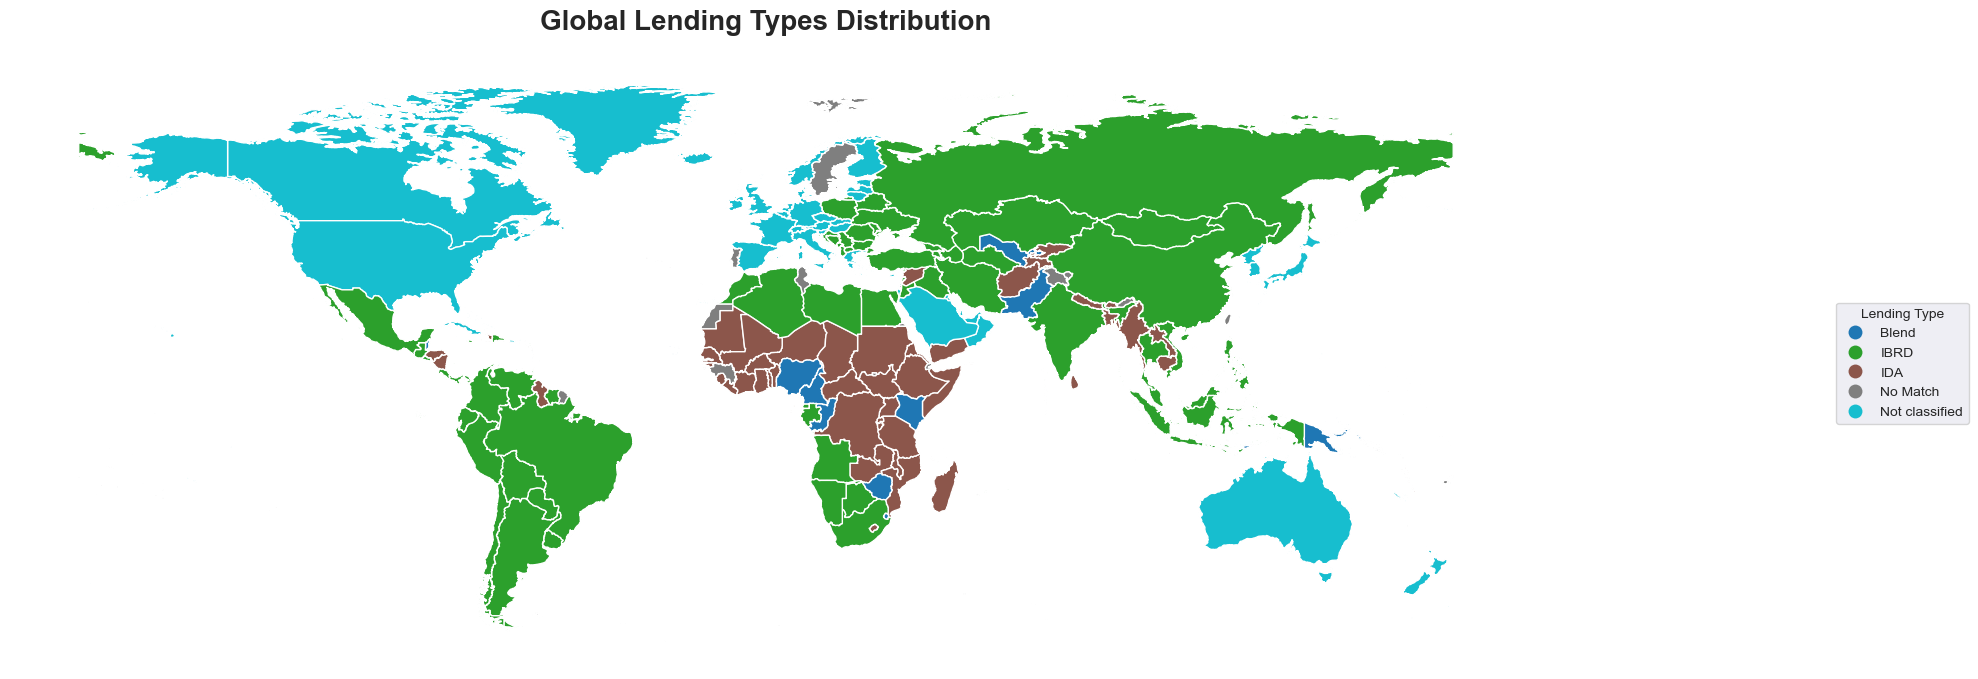

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Step 1: Prepare Data
# Convert Latitude and Longitude columns to numeric to handle any errors
df_all_countries["Latitude"] = pd.to_numeric(df_all_countries["Latitude"], errors="coerce")
df_all_countries["Longitude"] = pd.to_numeric(df_all_countries["Longitude"], errors="coerce")
data = df_all_countries.copy()  # Create a copy of the dataset for further processing

# Step 2: Load GeoJSON Data
# Read the GeoJSON file for country boundaries and set CRS to WGS 84 (EPSG:4326)
world = gpd.read_file(file_path_geojson)
world = world.to_crs(epsg=4326)

# Step 3: Create GeoDataFrame from Data Points
# Create a geometry column using Longitude and Latitude and convert to GeoDataFrame
data['geometry'] = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
points = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")

# Step 4: Perform Spatial Join
# Match data points to countries based on their geographical location
matched_points = gpd.sjoin(points, world, how='inner', predicate='within')

# Step 5: Map Lending Types
# Map lending type categories from matched points to countries using 'iso3' and 'ID'
world['Lending Type'] = world['iso3'].map(matched_points.set_index('ID')['Lending Type'].to_dict()).fillna('No Match')

# Define colors for each lending type category
income_colors = {
    'IDA': '#e41a1c',           # Bright red
    'IBRD': '#377eb8',          # Strong blue
    'Blend': '#4daf4a',         # Vibrant green
    'Not classified': '#ffff33',# Yellow
    'Aggregates': '#ffff33'     # Yellow
}

# Ensure all unique lending type categories are covered in income_colors
for category in world['Lending Type'].unique():
    if category not in income_colors:
        print(f"Adding missing category '{category}' to income_colors.")
        income_colors[category] = '#999999'  # Default color for missing categories

# Step 6: Visualize the Map
# Plot the world map with countries color-coded by lending type
fig, ax = plt.subplots(figsize=(20, 12))
world.plot(
    column='Lending Type',             # Column to use for coloring
    legend=True,                       # Display a legend
    legend_kwds={
        'title': 'Lending Type',       # Title for the legend
        'bbox_to_anchor': (1.3, 0.5),  # Position the legend
        'loc': 'center right'          # Align the legend
    },
    categorical=True,                  # Treat data as categorical
    cmap='tab10',                      # Use a predefined colormap
    ax=ax                              # Specify axes
)

# Set the plot title and remove axes for clarity
ax.set_title(
    "Global Lending Types Distribution",  # Title for the map
    fontsize=20, pad=20, fontweight='bold'
)
ax.axis('off')  # Turn off axes for cleaner visualization
plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()  # Display the final map


### Explanation of World Bank Lending Types

The World Bank classifies countries into different lending types based on their eligibility for financial assistance and the terms under which assistance is provided. Below is an explanation of these lending types:

#### 1. **Not Classified**
   - These are entities or areas that the World Bank does not assign a lending classification.
   - Examples may include regions, aggregates, or areas that are not eligible for direct lending or are not member countries.

#### 2. **Aggregates**
   - **Aggregates** refer to grouped data for multiple countries, typically used for regional or income-based statistics.
   - These are not actual countries but statistical summaries of a region or group, such as "Sub-Saharan Africa" or "Low-Income Countries."

#### 3. **IDA (International Development Association)**
   - **IDA** provides concessional (low-interest or interest-free) loans and grants to the world’s poorest countries.
   - Eligibility is based on a country’s per capita income and lack of creditworthiness to borrow from the International Bank for Reconstruction and Development (IBRD).
   - **Focus**: Poverty reduction, infrastructure development, and improving living conditions in low-income countries.

#### 4. **IBRD (International Bank for Reconstruction and Development)**
   - **IBRD** offers loans and financial services to middle-income and creditworthy low-income countries.
   - Loans are provided at near-market rates to finance projects and reforms that promote sustainable development.
   - **Focus**: Infrastructure development, education, healthcare, and economic reform in more developed or emerging economies.

#### 5. **Blend**
   - **Blend countries** are eligible for both IDA and IBRD assistance.
   - These countries are in transition, moving from low-income to middle-income status, and have limited creditworthiness.
   - They receive a mix of concessional financing from IDA and non-concessional loans from IBRD.
   - **Focus**: Helping countries bridge the gap as they transition out of poverty.

---

#### Summary Table

| Lending Type     | Description                                                                                  | Example Focus Areas                              |
|------------------|----------------------------------------------------------------------------------------------|------------------------------------------------|
| **Not Classified** | Unclassified entities or non-member regions.                                               | Statistical data or regional analysis.         |
| **Aggregates**     | Summaries for regions or income groups.                                                    | Regional or global development metrics.        |
| **IDA**            | Concessional loans/grants for the poorest countries.                                       | Basic infrastructure, poverty alleviation.     |
| **IBRD**           | Loans for middle-income and creditworthy low-income countries.                             | Economic growth, advanced infrastructure.      |
| **Blend**          | Combination of IDA and IBRD support for transitioning countries.                           | Bridging poverty-to-growth transitions.        |

---

This classification reflects the World Bank's tailored financial support strategy to meet the unique needs of different countries and regions.


## *3.3* Visualizing Lending Types and Income Levels in Latin America & Caribbean

This script creates maps and a table to visualize data in the specified region. To begin, we will examine what regions are present in the countries dataframe.


In [12]:
# First, let's check what unique values exist in the data
data = df_all_countries.copy()
print("Unique Regions in the data:")
print(data['Region'].unique())

Unique Regions in the data:
['Latin America & Caribbean ' 'Aggregates' 'South Asia'
 'Sub-Saharan Africa ' 'Europe & Central Asia'
 'Middle East & North Africa' 'East Asia & Pacific' 'North America']



#### Steps:
1. **Define Constants**:
   - Set the target region and file path for the GeoJSON file.

2. **Filter Data**:
   - Filter the dataset for the target region and create geometries for the points.

3. **Load GeoJSON**:
   - Load the GeoJSON file for country boundaries and set CRS to WGS 84.

4. **Spatial Join**:
   - Match points with countries and extract the relevant region.

5. **Map Lending Types and Income Levels**:
   - Associate lending types and income levels with countries.

6. **Prepare Data for Table**:
   - Extract country-level information for tabular display.

7. **Visualize Maps and Table**:
   - Plot maps for countries, lending types, and income levels.
   - Display a table summarizing the data.

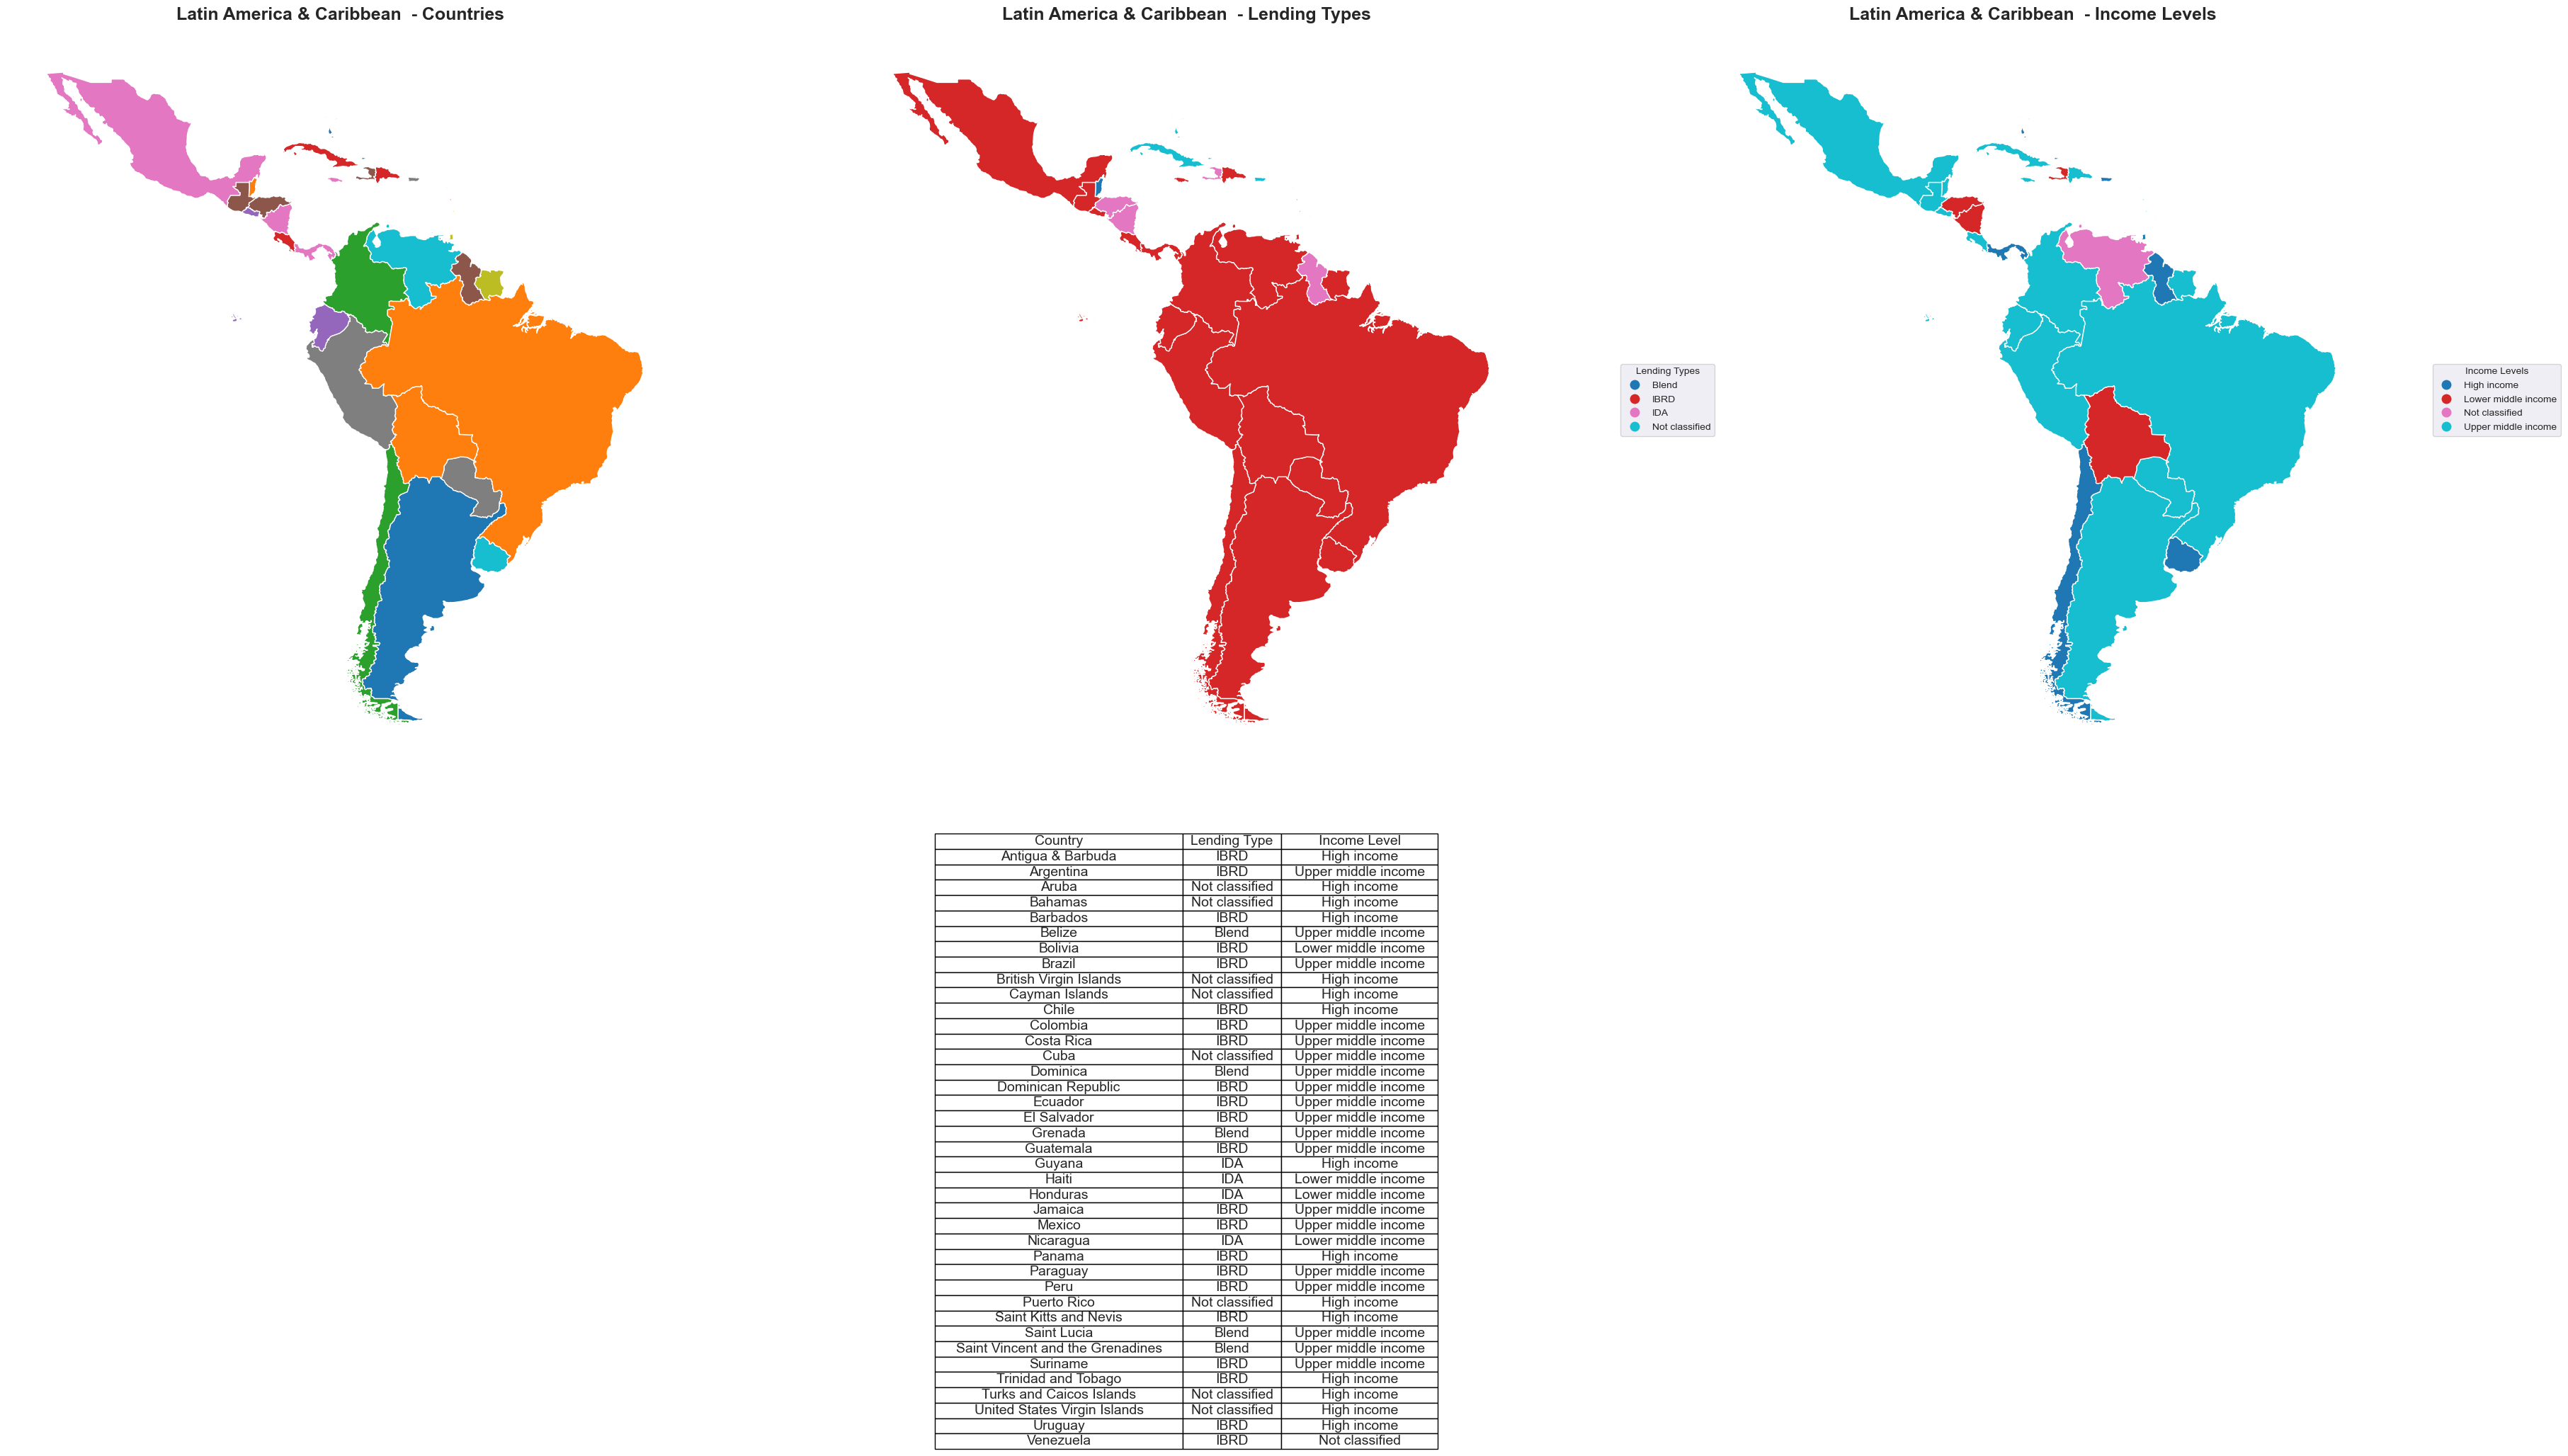

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Step 1: Define Constants
region_to_plot = 'Latin America & Caribbean '


# Step 2: Filter Data for the Region
# Filter for the region and create geometries from longitude and latitude
data = df_all_countries.copy()
data = data[data['Region'] == region_to_plot]
data['geometry'] = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
points = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")

# Step 3: Load and Process GeoJSON Data
# Read GeoJSON file and set CRS to WGS 84
world = gpd.read_file(file_path_geojson).to_crs(epsg=4326)

# Step 4: Spatial Join
# Match points to countries within the region and filter countries
matched_points = gpd.sjoin(points, world, how='inner', predicate='within')
countries_in_region = matched_points['iso3'].unique()
world = world[world['iso3'].isin(countries_in_region)]

# Step 5: Map Lending Type and Income Level
# Map data to countries and fill missing values
world['Lending Type'] = world['iso3'].map(matched_points.set_index('ID')['Lending Type'].to_dict()).fillna('No Match')
world['Income Level'] = world['iso3'].map(matched_points.set_index('ID')['Income Level'].to_dict()).fillna('No Match')

# Step 6: Prepare Data for Table
# Extract relevant columns for table display
table_data = world[['name', 'Lending Type', 'Income Level']].rename(columns={
    'name': 'Country', 'Lending Type': 'Lending Type', 'Income Level': 'Income Level'
}).sort_values(by='Country')

# Step 7: Visualize Maps and Table
# Set up a large figure for maps and a table
fig = plt.figure(figsize=(36, 24))
grid = fig.add_gridspec(nrows=2, ncols=3, height_ratios=[7, 1])

# Define parameters for maps
plot_params = [
    {'column': 'name', 'title': 'Countries'},
    {'column': 'Lending Type', 'title': 'Lending Types'},
    {'column': 'Income Level', 'title': 'Income Levels'}
]

# Plot maps
for i, params in enumerate(plot_params):
    ax = fig.add_subplot(grid[0, i])
    world.plot(
        column=params['column'], categorical=True, legend=(params['column'] != 'name'),
        legend_kwds={'title': params['title'], 'bbox_to_anchor': (1.3, 0.5), 'loc': 'center right'},
        ax=ax
    )
    ax.set_title(f"{region_to_plot} - {params['title']}", fontsize=18, pad=20, fontweight='bold')
    ax.axis('off')

# Plot table
table_ax = fig.add_subplot(grid[1, :])
table_ax.axis('off')
table = table_ax.table(
    cellText=table_data.values, colLabels=table_data.columns,
    cellLoc='center', loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(table_data.columns))))

plt.tight_layout()
plt.show()


# 4. Introduction to Indicators data

## *4.A* Topics

In this section, we explore **Topics** provided by the World Bank API. Topics represent key areas of global development, such as education, health, economy, and climate change. These topics help structure the World Bank's vast repository of data, making it easier to access and analyze specific datasets relevant to global challenges.

#### Objectives:
- Understand the available **Topics** from the World Bank API.
- Organize and display these topics in a clean, readable format.
- Set the foundation for exploring specific indicators within each topic.

#### Steps:
1. **Fetch Topics**:
   - Use the `wbdata` Python package to retrieve a list of topics from the World Bank API.
   - Topics include a unique ID, a descriptive name, and a detailed explanation of the scope of each topic.

2. **Organize and Rename Columns**:
   - Rename columns to:
     - `ID`: The unique identifier for each topic.
     - `Topic Name`: A concise name for the topic.
     - `Topic Description`: A detailed explanation of what the topic encompasses.

3. **Style the DataFrame**:
   - Format the DataFrame for better readability:
     - Align text to the left for descriptions.
     - Bold and align headers for emphasis.
     - Hide unnecessary indices for a cleaner display.

4. **Overview of Topics**:
   - Present the topics in a well-formatted table for easy exploration and understanding.

#### Example Output:

The resulting table will display:

| ID | Topic Name                      | Topic Description                                                                                        |
|----|---------------------------------|----------------------------------------------------------------------------------------------------------|
| 1  | Agriculture & Rural Development | Discusses challenges like land degradation, food security, and agricultural productivity in rural areas. |
| 2  | Education                       | Covers global education outcomes, access, and participation across regions.                              |
| 3  | Health                          | Focuses on healthcare access, disease prevention, and public health systems in developing nations.       |

#### How to Use Topics:
- Each topic serves as an entry point to access specific indicators in the World Bank API.
- For example:
  - **Education**: Explore metrics such as school enrollment rates, literacy rates, or government education expenditure.
  - **Health**: Retrieve data on life expectancy, immunization rates, or healthcare access.


In [14]:
import pandas as pd
import wbdata

# Step 1: Fetch Data from World Bank API
# Retrieve topics from the World Bank API and store them in a DataFrame
topics = pd.DataFrame(wbdata.get_topics())

# Step 2: Rename Columns
# Rename columns for clarity in the DataFrame
topics = topics.rename(columns={"id": "ID", "value": "Topic Name", "sourceNote": "Topic Description"})

# Step 3: Style the DataFrame
# Apply styling for better readability
formatted_output = (
    topics.style
    .set_properties(**{'text-align': 'left'})  # Align text to the left
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left'), ('font-weight', 'bold')]
    }])  # Style the header
    .hide(axis='index')  # Hide the index column
)

# Step 4: Display the Styled DataFrame
formatted_output


ID,Topic Name,Topic Description
1,Agriculture & Rural Development,"For the 70 percent of the world's poor who live in rural areas, agriculture is the main source of income and employment. But depletion and degradation of land and water pose serious challenges to producing enough food and other agricultural products to sustain livelihoods here and meet the needs of urban populations. Data presented here include measures of agricultural inputs, outputs, and productivity compiled by the UN's Food and Agriculture Organization."
2,Aid Effectiveness,"Aid effectiveness is the impact that aid has in reducing poverty and inequality, increasing growth, building capacity, and accelerating achievement of the Millennium Development Goals set by the international community. Indicators here cover aid received as well as progress in reducing poverty and improving education, health, and other measures of human welfare."
3,Economy & Growth,"Economic growth is central to economic development. When national income grows, real people benefit. While there is no known formula for stimulating economic growth, data can help policy-makers better understand their countries' economic situations and guide any work toward improvement. Data here covers measures of economic growth, such as gross domestic product (GDP) and gross national income (GNI). It also includes indicators representing factors known to be relevant to economic growth, such as capital stock, employment, investment, savings, consumption, government spending, imports, and exports."
4,Education,"Education is one of the most powerful instruments for reducing poverty and inequality and lays a foundation for sustained economic growth. The World Bank compiles data on education inputs, participation, efficiency, and outcomes. Data on education are compiled by the United Nations Educational, Scientific, and Cultural Organization (UNESCO) Institute for Statistics from official responses to surveys and from reports provided by education authorities in each country."
5,Energy & Mining,"The world economy needs ever-increasing amounts of energy to sustain economic growth, raise living standards, and reduce poverty. But today's trends in energy use are not sustainable. As the world's population grows and economies become more industrialized, nonrenewable energy sources will become scarcer and more costly. Data here on energy production, use, dependency, and efficiency are compiled by the World Bank from the International Energy Agency and the Carbon Dioxide Information Analysis Center."
6,Environment,"Natural and man-made environmental resources – fresh water, clean air, forests, grasslands, marine resources, and agro-ecosystems – provide sustenance and a foundation for social and economic development. The need to safeguard these resources crosses all borders. Today, the World Bank is one of the key promoters and financiers of environmental upgrading in the developing world. Data here cover forests, biodiversity, emissions, and pollution. Other indicators relevant to the environment are found under data pages for Agriculture & Rural Development, Energy & Mining, Infrastructure, and Urban Development."
7,Financial Sector,"An economy's financial markets are critical to its overall development. Banking systems and stock markets enhance growth, the main factor in poverty reduction. Strong financial systems provide reliable and accessible information that lowers transaction costs, which in turn bolsters resource allocation and economic growth. Indicators here include the size and liquidity of stock markets; the accessibility, stability, and efficiency of financial systems; and international migration and workers\ remittances, which affect growth and social welfare in both sending and receiving countries."
8,Health,"Improving health is central to the Millennium Development Goals, and the public sector is the main provider of health care in developing countries. To reduce inequities, many countries have emphas

## *4.B* Indicators

### **4.B.1** Searching by Topic

This code block retrieves and processes data related to **Topic 3: Economy & Growth** from the World Bank API. Topic 3 encompasses indicators that measure economic growth, such as GDP, GNI, capital stock, employment, investment, and more. These indicators help policymakers and researchers analyze and understand economic trends and conditions.

#### Steps:
1. **Fetch Data**:
   - Use the `wbdata` Python package to fetch indicators related to "Economy & Growth" by specifying `topic=3`.
   - The data is normalized into a Pandas DataFrame.

2. **Rename Columns**:
   - Rename columns for clarity and better interpretation:
     - `id` → `Series ID`
     - `name` → `Series Name`
     - `sourceNote` → `Series Description`
     - `sourceOrganization` → `Source Organization`
     - `source.id` → `Source ID`

3. **Select Relevant Columns**:
   - Extract key columns to focus on the essential information:
     - `Series ID`: Unique identifier for each indicator.
     - `Series Name`: The name of the economic indicator.
     - `Series Description`: A detailed explanation of the indicator's significance.
     - `Source Organization`: The organization providing the data.
     - `Source ID`: The identifier for the data source.

4. **Display Data**:
   - Show the first 10 rows of the processed DataFrame to preview the indicators.

#### Example Output:
| Series ID        | Series Name                    | Series Description                                                                                         | Source Organization          | Source ID   |
|------------------|--------------------------------|------------------------------------------------------------------------------------------------------------|------------------------------|-------------|
| NY.GDP.MKTP.CD   | GDP (current US$)              | GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy...      | World Bank National Accounts | WDI         |
| NY.GDP.PCAP.CD   | GDP per capita (current US$)   | GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value...   | World Bank National Accounts | WDI         |

#### How to Use:
- The resulting DataFrame lists economic indicators available for analysis under Topic 3.
- Use the `Series ID` column to fetch time-series data for specific indicators using additional World Bank API queries.
- Incorporate these indicators into your data analysis and visualizations to explore economic trends.


In [15]:
import pandas as pd
import wbdata

# Step 1: Fetch Series Data for Topic 3 (Economy & Growth)
# Use the World Bank API to fetch indicators related to "Economy & Growth" (topic=3)
series = pd.json_normalize(wbdata.get_indicators(topic=3))

# Step 2: Rename Columns for Clarity
# Rename columns to make the DataFrame more interpretable
series = series.rename(columns={
    "id": "Series ID",
    "name": "Series Name",
    "sourceNote": "Series Description",
    "sourceOrganization": "Source Organization",
    "source.id": "Source ID"
})

# Step 3: Select Relevant Columns
# Retain only the necessary columns for analysis
series = series[['Series ID', 'Series Name', 'Series Description', 'Source Organization', 'Source ID']]

# Step 4: Display the First 10 Rows
# Show the first 10 rows of the formatted DataFrame
series.head(10)


,Series ID,Series Name,Series Description,Source Organization,Source ID
0,5.0.AMeanIncGr.All,Annualized Mean Income Growth (2004-2014),The official indicator to monitor shared prosp...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,37
1,5.0.AMeanIncGr.B40,Annualized Mean Income Growth Bottom 40 Percen...,The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,37
2,5.1.AMeanIncGr.All,Annualized Mean Income Growth (2004-2009),The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,37
3,5.1.AMeanIncGr.B40,Annualized Mean Income Growth Bottom 40 Percen...,The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,37
4,5.2.AMeanIncGr.All,Annualized Mean Income Growth (2009-2014),The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,37
5,5.2.AMeanIncGr.B40,Annualized Mean Income Growth Bottom 40 Percen...,The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,37
6,6.0.Conspc,Consumption per capita (2011 $),Consumption per capita is the market value of ...,LAC Equity Lab Tablulations of the World Devel...,37
7,6.0.GDP_current,GDP (current $),GDP is the sum of gross value added by all res...,World Development Indicators (World Bank),37
8,6.0.GDP_growth,GDP growth (annual %),Annual percentage growth rate of GDP at market...,World Development Indicators (World Bank),37
9,6.0.GDP_usd,GDP (constant 2005 $),GDP is the sum of gross value added by all res...,World Development Indicators (World Bank),37


### **4.B.2** Searching by Query


This script demonstrates how to query the World Bank API for indicators related to **"Consumption"** using the `wbdata` Python package. The query returns indicators that focus on various aspects of consumption, including household spending, government expenditure, and broader consumption metrics.

#### Steps:
1. **Query Indicators**:
   - Use the `wbdata.get_indicators(query='Consumption')` function to search for indicators containing the term "Consumption."

2. **Normalize Data**:
   - Convert the API response into a Pandas DataFrame for easier analysis and manipulation.

3. **Rename Columns**:
   - Rename columns to improve clarity and readability:
     - `id` → `Series ID`
     - `name` → `Series Name`
     - `sourceNote` → `Series Description`
     - `sourceOrganization` → `Source Organization`
     - `source.id` → `Source ID`

4. **Select Relevant Columns**:
   - Retain only key fields to focus on essential information:
     - `Series ID`: A unique identifier for each indicator.
     - `Series Name`: The name of the indicator.
     - `Series Description`: A detailed explanation of what the indicator measures.
     - `Source Organization`: The organization providing the data.
     - `Source ID`: Identifier for the data source.

5. **Preview Data**:
   - Display the first 10 rows of the cleaned and formatted DataFrame for an overview of the retrieved indicators.

#### Example Output:

| Series ID          | Series Name                              | Series Description                                                                                     | Source Organization         | Source ID       |
|--------------------|------------------------------------------|---------------------------------------------------------------------------------------------------------|-----------------------------|-----------------|
| NE.CON.PRVT.CD     | Household final consumption expenditure  | Household final consumption expenditure includes the market value of goods and services purchased...    | World Bank National Accounts| WDI             |
| GC.XPN.TOTL.GD.ZS  | Expense (% of GDP)                      | Expense is cash payments for operating activities of the government in providing goods and services...  | IMF Government Finance Stats| WDI             |


In [16]:
import pandas as pd
import wbdata

# Step 1: Query Indicators Related to "Consumption"
# Use the World Bank API to search for indicators containing "Consumption" in their names or descriptions
series = pd.json_normalize(wbdata.get_indicators(query='Consumption'))

# Step 2: Rename Columns for Clarity
# Rename columns to make the DataFrame more interpretable
series = series.rename(columns={
    "id": "Series ID",
    "name": "Series Name",
    "sourceNote": "Series Description",
    "sourceOrganization": "Source Organization",
    "source.id": "Source ID"
})

# Step 3: Select Relevant Columns
# Retain only the necessary columns for analysis
series = series[['Series ID', 'Series Name', 'Series Description', 'Source Organization', 'Source ID']]

# Step 4: Display the First 10 Rows
# Show the first 10 rows of the formatted DataFrame
series.head(10)


,Series ID,Series Name,Series Description,Source Organization,Source ID
0,1.1_TOTAL.FINAL.ENERGY.CONSUM,Total final energy consumption (TFEC),Total final energy consumption (TFEC): This in...,World Bank and International Energy Agency (IE...,35
1,110000,110000:INDIVIDUAL CONSUMPTION EXPENDITURE BY H...,,,71
2,130000,130000:INDIVIDUAL CONSUMPTION EXPENDITURE BY G...,,,71
3,1300000,1300000:INDIVIDUAL CONSUMPTION EXPENDITURE BY ...,,,78
4,140000,140000:COLLECTIVE CONSUMPTION EXPENDITURE BY G...,,,71
5,1400000,1400000:COLLECTIVE CONSUMPTION EXPENDITURE BY ...,,,78
6,2.1_SHARE.TOTAL.RE.IN.TFEC,Renewable energy consumption(% in TFEC),Renewable energy consumption(% in TFEC): Share...,World Bank and International Energy Agency (IE...,35
7,3.1_RE.CONSUMPTION,Renewable energy consumption (TJ),Renewable energy consumption (TJ): This indica...,World Bank and International Energy Agency (IE...,35
8,6.0.Conspc,Consumption per capita (2011 $),Consumption per capita is the market value of ...,LAC Equity Lab Tablulations of the World Devel...,37
9,9020000,9020000:ACTUAL INDIVIDUAL CONSUMPTION,,,78


## *4.C* Loading Data
This script retrieves and processes data for **"Consumption per capita (2011 $)"** from the World Bank API, focusing on countries in the **Latin America & Caribbean** region. Below are the detailed steps:

---

#### Steps:
1. **Define the Series**:
   - Specify the ID (`6.0.Conspc`) for the desired series, "Consumption per capita (2011 $)".
   - Assign a human-readable name for the series for clarity in the output.

2. **Filter Countries**:
   - Extract a list of country IDs for countries in the **Latin America & Caribbean** region from the existing dataset.

3. **Fetch Data**:
   - Use the `wbdata.get_series()` function to retrieve monthly data for the specified series and countries.

4. **Transform to DataFrame**:
   - Convert the retrieved data into a Pandas DataFrame.
   - Rename the column holding the series values to reflect the series name.

5. **Clean and Format Data**:
   - Drop rows with missing values to ensure the data is clean.
   - Format the series values to two decimal places for readability.

6. **Preview Data**:
   - Display the first few rows of the cleaned DataFrame to verify correctness and gain a quick overview.


In [17]:
# Step 1: Define the series and parameters
# Series ID and descriptive name for "Consumption per capita (2011 $)"
SERIES_TO_GET = '6.0.Conspc'
SERIES_NAME = "Consumption per capita (2011 $)"

# Step 2: Filter countries for Latin America & Caribbean region
# Retrieve unique country IDs for the specified region
list_countries = df_all_countries[df_all_countries['Region'] == 'Latin America & Caribbean ']['ID'].unique().tolist()

# Step 3: Fetch data from World Bank API
# Retrieve the series data for the selected countries
data = wbdata.get_series(SERIES_TO_GET, parse_dates=True, freq='Y', country=list_countries)

# Step 4: Convert to DataFrame and rename columns
# Transform the data into a DataFrame and rename the value column for clarity
data_df = pd.DataFrame(data).reset_index()
data_df = data_df.rename(columns={"value": SERIES_NAME})

# Step 5: Clean and format data
# Drop rows with missing values and format the series values for readability
data_df = data_df.dropna()
data_df[SERIES_NAME] = data_df[SERIES_NAME].map("{:.2f}".format)

# Step 6: Display the first few rows
# Preview the resulting DataFrame to verify correctness
data_df.head()

,country,date,Consumption per capita (2011 $)
15,Bolivia,2014-01-01,3840.31
16,Bolivia,2013-01-01,3699.59
17,Bolivia,2012-01-01,3547.55
18,Bolivia,2011-01-01,3445.38
19,Bolivia,2010-01-01,3327.80


In [18]:
#To view additional information about series:
series[series['Series ID']=='6.0.Conspc']


,Series ID,Series Name,Series Description,Source Organization,Source ID
8,6.0.Conspc,Consumption per capita (2011 $),Consumption per capita is the market value of ...,LAC Equity Lab Tablulations of the World Devel...,37


# 5. Plotting Indicators

## *5.A* Time Series
This script visualizes **Consumption per Capita (2011 $)** trends for individual countries and aggregated statistics across the **Latin America & Caribbean** region. The output includes two side-by-side plots for a comprehensive view of the data.

---

#### Steps:

1. **Prepare Data**:
   - Convert the `date` column to `datetime` for proper sorting.
   - Convert the series column to `float` to enable numerical operations.

2. **Aggregate Data by Date**:
   - Compute the following statistics for each date:
     - **Min Value**: The lowest consumption per capita on that date.
     - **Max Value**: The highest consumption per capita on that date.
     - **Mean Value**: The average consumption per capita.
     - **SEM**: Standard error of the mean (SEM) using degrees of freedom = 1.
   - Calculate **95% Confidence Intervals**:
     - Lower Bound = Mean - 1.96 × SEM
     - Upper Bound = Mean + 1.96 × SEM

3. **Set Up Subplots**:
   - Create a figure with two side-by-side plots:
     - Plot 1: Country-specific trends.
     - Plot 2: Aggregated statistics.

4. **Plot Country-Specific Trends (Plot 1)**:
   - For each country:
     - Plot its consumption per capita trend over time.
   - Add a title, labels, and a legend.

5. **Plot Aggregated Statistics (Plot 2)**:
   - Show the range (Min to Max) using a shaded area.
   - Add the 95% confidence interval as a shaded region.
   - Plot the mean value as a line.
   - Add a title, labels, and a legend.

6. **Finalize and Display**:
   - Adjust the layout to ensure the plots are readable.
   - Display the plots side by side.


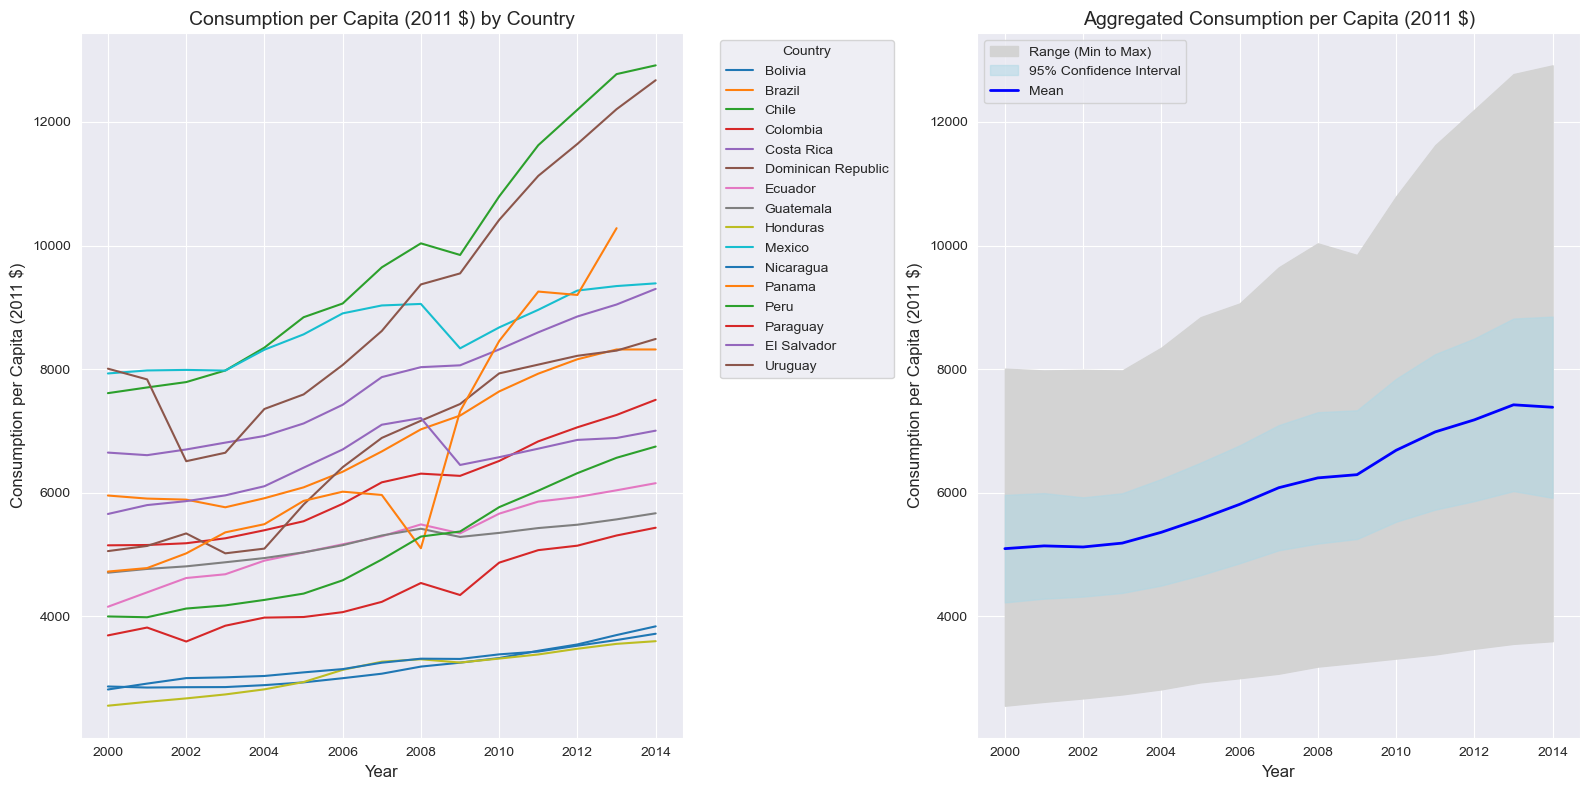

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Step 1: Prepare the Data
# Convert the date column to datetime for sorting and the series column to float for numerical calculations
data_df['date'] = pd.to_datetime(data_df['date'])
data_df[SERIES_NAME] = data_df[SERIES_NAME].astype(float)

# Step 2: Aggregate Data by Date
# Compute aggregated statistics: min, max, mean, and standard error of the mean (SEM)
aggregated = data_df.groupby('date')[SERIES_NAME].agg(
    min_value='min',
    max_value='max',
    mean_value='mean',
    sem_value=lambda x: sem(x, ddof=1)  # Compute SEM with degrees of freedom = 1
).reset_index()

# Calculate confidence intervals (95%)
aggregated['ci_lower'] = aggregated['mean_value'] - 1.96 * aggregated['sem_value']
aggregated['ci_upper'] = aggregated['mean_value'] + 1.96 * aggregated['sem_value']

# Step 3: Set Up Subplots
# Create a figure with two subplots for side-by-side visualization
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Step 4: Plot Country-Specific Trends (Plot 1)
# Plot the trends for each country in the dataset
for country in data_df['country'].unique():
    country_data = data_df[data_df['country'] == country]
    axs[0].plot(country_data['date'], country_data[SERIES_NAME], label=country)

# Customize Plot 1
axs[0].set_title('Consumption per Capita (2011 $) by Country', fontsize=14)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Consumption per Capita (2011 $)', fontsize=12)
axs[0].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Step 5: Plot Aggregated Statistics (Plot 2)
# Fill between min and max values, confidence intervals, and plot the mean
axs[1].fill_between(aggregated['date'], aggregated['min_value'], aggregated['max_value'],
                    color='lightgray', label='Range (Min to Max)')
axs[1].fill_between(aggregated['date'], aggregated['ci_lower'], aggregated['ci_upper'],
                    color='lightblue', alpha=0.5, label='95% Confidence Interval')
axs[1].plot(aggregated['date'], aggregated['mean_value'], color='blue', label='Mean', linewidth=2)

# Customize Plot 2
axs[1].set_title('Aggregated Consumption per Capita (2011 $)', fontsize=14)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Consumption per Capita (2011 $)', fontsize=12)
axs[1].legend(loc='upper left', fontsize=10)

# Step 6: Adjust Layout and Show Plots
# Optimize layout for readability and display the plots
plt.tight_layout()
plt.show()


## *5.B* World Map


This script visualizes the most recent values of **Consumption per Capita (2011 $)** for countries in the dataset. It merges country information with the main dataset, performs spatial operations, and plots the results on a world map.

---

#### Steps:

1. **Filter and Merge Country Information**:
   - Extract relevant columns (`ID`, `Name`, `Income Level`, `Lending Type`, `Latitude`, `Longitude`) for countries in the dataset.
   - Merge this information with the main data on country names.

2. **Format the DataFrame**:
   - Convert the `date` column to `datetime` for proper handling.
   - Ensure the `SERIES_NAME` column is numeric to allow operations.

3. **Create GeoDataFrame for Points**:
   - Add a geometry column using `Latitude` and `Longitude`.
   - Convert the DataFrame to a GeoDataFrame for geospatial processing.

4. **Load GeoJSON Data**:
   - Load a GeoJSON file containing world administrative boundaries.
   - Reproject the GeoDataFrame to the WGS 84 coordinate reference system (EPSG:4326).

5. **Perform Spatial Join**:
   - Match data points to country polygons using a spatial join.

6. **Extract Most Recent Values**:
   - Group data by `iso3` and select the most recent value for each country based on the `date` column.

7. **Update World GeoDataFrame**:
   - Filter the world GeoDataFrame for countries in the dataset.
   - Map the most recent `SERIES_NAME` values to the corresponding countries.

8. **Plot the Most Recent Values**:
   - Create a choropleth map visualizing the most recent values of `SERIES_NAME`.
   - Use a color gradient (`coolwarm`) to represent data variation.
   - Include a legend for interpretation.

9. **Customize and Display**:
   - Add a title to the map and turn off axes for a clean presentation.
   - Adjust the layout and render the visualization.

---


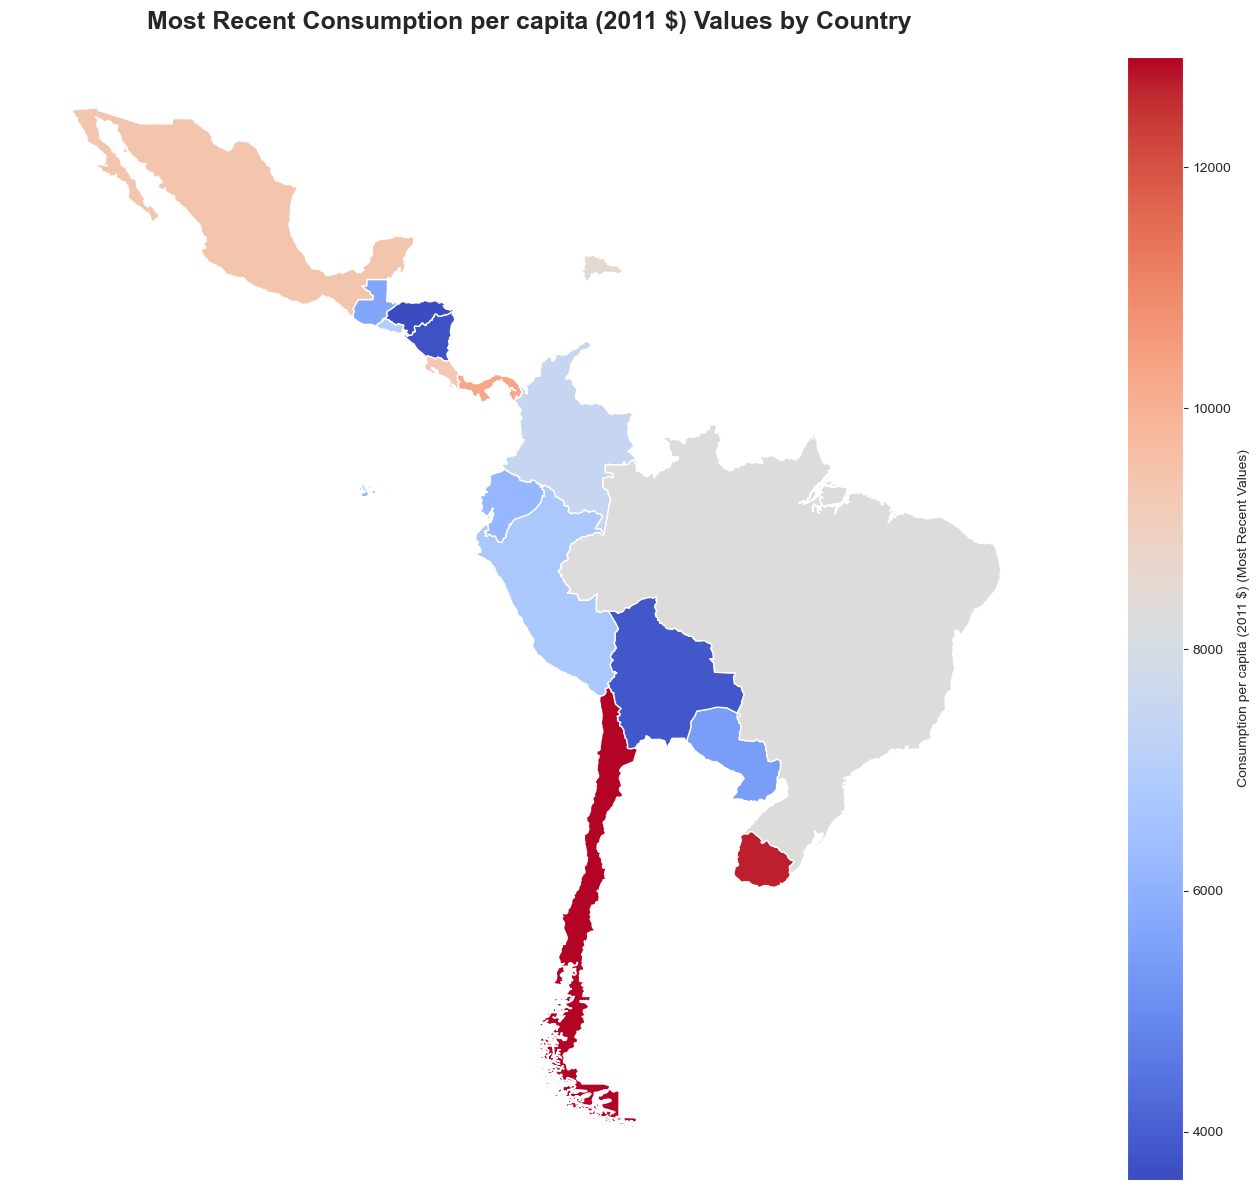

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Step 1: Filter and Merge Country Information
# Extract relevant columns for countries present in the main dataset
country_info_df = df_all_countries[df_all_countries['Name'].isin(data_df['country'].unique().tolist())][
    ['ID', 'Name', 'Income Level', 'Lending Type', 'Latitude', 'Longitude']
]

# Step 2: Format the DataFrame
# Ensure proper formatting of date and numerical columns
data_df['date'] = pd.to_datetime(data_df['date'])
data_df[SERIES_NAME] = data_df[SERIES_NAME].astype(float)

# Step 3: Merge Country Information with Data
# Merge country info with main data on country names
data = pd.merge(country_info_df, data_df, how='inner', left_on='Name', right_on='country')

# Step 4: Create GeoDataFrame for Points
# Add a geometry column based on Latitude and Longitude
data['geometry'] = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
points = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")

# Step 5: Load GeoJSON Data
# Load and process GeoJSON data for world boundaries
world = gpd.read_file(file_path_geojson).to_crs(epsg=4326)

# Step 6: Perform Spatial Join
# Match data points to countries using spatial join
matched_points = gpd.sjoin(points, world, how='inner', predicate='within')

# Step 7: Extract Most Recent Values
# Filter data to include only the most recent value for each country
most_recent_data = matched_points.loc[matched_points.groupby('iso3')['date'].idxmax()]

# Step 8: Update World GeoDataFrame
# Filter the world GeoDataFrame for matched countries
countries_in_region = matched_points['iso3'].unique()
world = world[world['iso3'].isin(countries_in_region)]

# Map the most recent SERIES_NAME values to the world GeoDataFrame
world[SERIES_NAME] = world['iso3'].map(most_recent_data.set_index('iso3')[SERIES_NAME].to_dict())

# Step 9: Plot the Most Recent Values
fig, ax = plt.subplots(figsize=(16, 12))
world.plot(
    column=SERIES_NAME,
    legend=True,
    legend_kwds={
        'label': f"{SERIES_NAME} (Most Recent Values)",
        'orientation': 'vertical'
    },
    cmap='coolwarm',
    ax=ax
)

# Customize the plot
ax.set_title(f"Most Recent {SERIES_NAME} Values by Country", fontsize=18, pad=20, fontweight='bold')
ax.axis('off')  # Turn off axis for a clean map

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## *5.C* Distribution Plot
This script visualizes the distribution of **Consumption per Capita (2011 $)** using two different plot types: a histogram with a kernel density estimate (KDE) and a violin plot. These visualizations provide insights into the distribution and spread of the most recent values for this metric across countries.

---

#### Steps:

1. **Merge Country Information with Main Data**:
   - Combine country-specific information with the main dataset using the country name as the key.

2. **Filter Most Recent Data**:
   - Select the most recent value for each country by finding the latest `date` entry.

3. **Plot Distribution as Histogram**:
   - Create a histogram to visualize the frequency of values.
   - Add a kernel density estimate (KDE) overlay to represent the data's probability density.
   - Use 30 bins to balance detail and readability.

4. **Plot Distribution as Violin Plot**:
   - Create a violin plot to show the data distribution and density across its range.
   - This provides a visual representation of both central tendencies and variability.

---

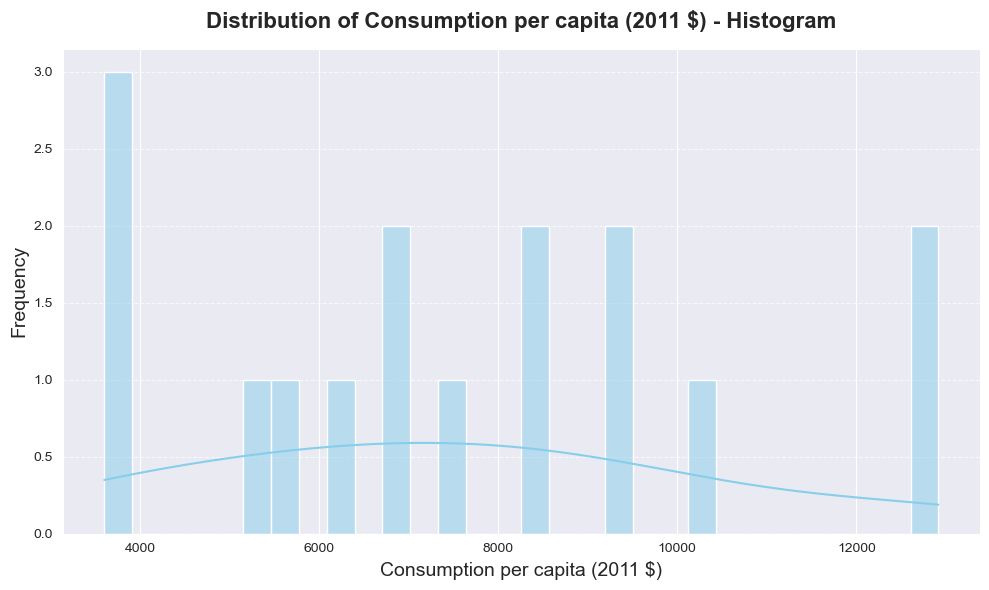

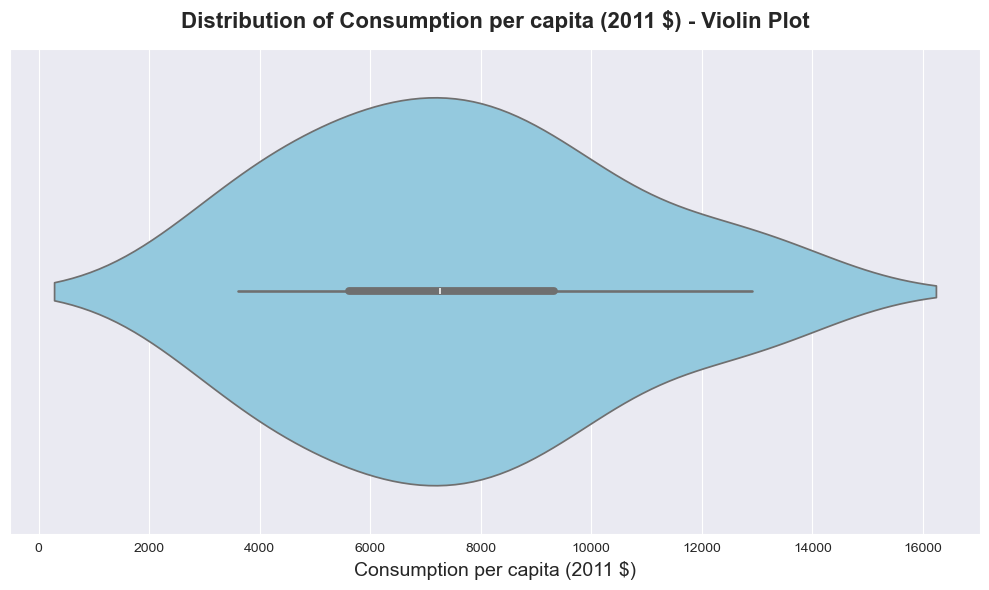

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Merge Country Information with Main Data
# Combine country info with the main dataset based on the country name
data = pd.merge(country_info_df, data_df, how='inner', left_on='Name', right_on='country')

# Step 2: Filter Most Recent Data
# Select the most recent value for each country based on the 'date' column
most_recent_data = data.loc[data.groupby('Name')['date'].idxmax()]

# Step 3: Plot Distribution as Histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    most_recent_data[SERIES_NAME].astype(float),  # Ensure numeric data for plotting
    bins=30,  # Number of bins for the histogram
    kde=True,  # Include kernel density estimate
    color='skyblue'
)
plt.title(f'Distribution of {SERIES_NAME} - Histogram', fontsize=16, fontweight='bold', pad=15)
plt.xlabel(SERIES_NAME, fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Step 4: Plot Distribution as Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    x=most_recent_data[SERIES_NAME].astype(float),  # Ensure numeric data for plotting
    color='skyblue'
)
plt.title(f'Distribution of {SERIES_NAME} - Violin Plot', fontsize=16, fontweight='bold', pad=15)
plt.xlabel(SERIES_NAME, fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Concluding Remarks



## Recommendations and Next Steps

### 1. Deepening Gender Discrepancy Analysis
- Expand the dataset to include additional variables like access to education, healthcare, and political participation by gender to provide a more nuanced understanding.
- Use machine learning models to identify key drivers of gender disparities globally.
- Perform region-specific analyses using GIS tools to visualize gender inequality hotspots and identify regions requiring focused interventions.

**Example: Visualizing Gender Disparities with GIS**
```python
import geopandas as gpd
import matplotlib.pyplot as plt

# Load geospatial data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gender_data = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data.longitude, merged_data.latitude))

# Plotting gender inequality index
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gender_data.plot(column='gender_inequality_index', ax=ax, legend=True, cmap='coolwarm', markersize=50)
plt.title("Global Gender Inequality Index")
plt.show()
```

---

### 2. Enhancing Statistical Analysis of Government Quality
- Incorporate longitudinal data to assess trends in governance quality over time and their impact on economic and social outcomes.
- Compare governance quality indices with measures of corruption, civil liberties, and public trust to create a comprehensive evaluation framework.
- Use GIS to map the relationship between governance quality and geographic factors, such as urbanization rates or proximity to trade routes.

**Example: Mapping Governance Quality**
```python
# Merge governance data with geospatial data
governance_map = world.merge(governance_data, left_on='iso_a3', right_on='country_code')

# Plot governance quality index
fig, ax = plt.subplots(figsize=(15, 10))
governance_map.plot(column='governance_quality_index', ax=ax, legend=True, cmap='YlGnBu')
plt.title("Governance Quality Across Countries")
plt.show()
```

---

### 3. Addressing Economic Challenges
- Conduct detailed statistical modeling to identify the most pressing economic challenges by region or country.
- Use GIS to overlay economic indicators (e.g., GDP per capita, unemployment rates) with environmental and demographic data to identify spatial patterns and potential root causes.
- Propose policy recommendations tailored to specific geospatial economic challenges.

**Example: Overlaying Economic and Demographic Data**
```python
# Overlaying economic data on population density
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
economic_data.plot(column='gdp_per_capita', ax=ax, legend=True, cmap='viridis', markersize=50)
plt.title("GDP Per Capita and Population Density")
plt.show()
```

---

### 4. Integrating GIS for Broader Insights
- Leverage GIS tools to create interactive visualizations that combine gender disparities, governance quality, and economic challenges for a holistic perspective.
- Collaborate with organizations specializing in spatial analysis to enhance the accessibility and usability of GIS findings for policymakers and stakeholders.
- Use spatial clustering techniques to identify regions with overlapping challenges, enabling targeted interventions with maximal impact.
